In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from module import MyClass, DephasingChannel, DepolarizingChannel, Results
import module.plotlib as plotlib
import seaborn as sns
plotlib.update_settings(usetex=True)
%load_ext autoreload
%autoreload 2

Create a color map

In [2]:
from matplotlib.colors import ListedColormap
colors = []
colors.append(mpl.colors.to_rgb('#4666FF'))
colors.append((0.8833417, 0.19830556, 0.26014181))
colors.append(mpl.colors.to_rgb('#FFA347'))
colors.append(mpl.colors.to_rgb('#FFE047'))
colors.append(mpl.colors.to_rgb('#9966CC'))
colors.append(mpl.colors.to_rgb('#26428B'))
colors.append(mpl.colors.to_rgb('#989898'))
colors.append(mpl.colors.to_rgb('#9BC4E2'))
newcmp = ListedColormap(colors)

Loop over all instances

In [3]:
import os
nb_path = os.path.dirname(os.path.realpath("__file__"))
os.chdir('../../data/')

In [4]:
# Calculate the cost at the output from QAOA
approxr_dephasing = []
approxr_depolarizing = []
var_dephasing = []
var_depolarizing = []

# Calculate the mitigated cost 
m_approxr_dephasing = []
m_approxr_depolarizing = []
m_var_dephasing = []
m_var_depolarizing = []

# Loop over all instances
for i in range(30):
    # Path to data
    path = 'max_cut_' + str(i) + '/'

    # Create result object
    res = Results(path)
    
    approxr, var = res.DephasingNoise()
    m_approx_r, m_var = res.DephasingNoiseWithVD()
    
    # Append results
    approxr_dephasing.append(approxr)
    m_approxr_dephasing.append(m_approx_r)
    var_dephasing.append(var)
    m_var_dephasing.append(m_var)
    
    approxr, var = res.DepolarizingNoise()
    m_approx_r, m_var = res.DepolarizingNoiseWithVD()

    # Append results
    approxr_depolarizing.append(approxr)
    m_approxr_depolarizing.append(m_approx_r)
    var_depolarizing.append(var)
    m_var_depolarizing.append(m_var)

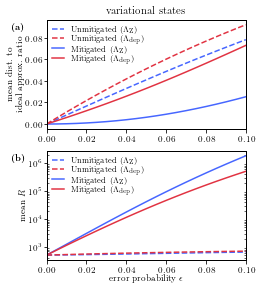

In [5]:
ideal = np.mean(approxr_dephasing,axis=0)[0]
x = np.linspace(0,0.1,21,endpoint=True)
threshold = 1e-3 

"""Save a figure"""
fig, ax = plotlib.create_fig(single_col=True,nrows=2)

"""First plot"""
ax[0].plot(x,ideal-np.mean(approxr_dephasing,axis=0),'--',label=r'Unmitigated ($\Lambda_\text{Z}$)',color=colors[0])

"""Second plot"""
ax[0].plot(x,ideal-np.mean(approxr_depolarizing,axis=0),'--',label=r'Unmitigated ($\Lambda_\text{dep}$)',color=colors[1])

"""Third plot"""
ax[0].plot(x,ideal-np.mean(m_approxr_dephasing,axis=0),'-',label=r'Mitigated ($\Lambda_\text{Z}$)',color=colors[0])

"""Fourth plot"""
ax[0].plot(x,ideal-np.mean(m_approxr_depolarizing,axis=0),'-',label=r'Mitigated ($\Lambda_\text{dep}$)',color=colors[1])

"""Labels, Ticks and Legens"""
#ax.set_yticks([.7,.74,.78,.82])
#ax.set_ylim([.695,.825])
#ax.set_xlim([0,.1])

ax[0].set_ylabel(r'mean dist. to'
                 '\n'
                 r'ideal approx. ratio');
ax[0].legend(loc="best", frameon=False, framealpha=1, ncol=1, fontsize=8)

ax[0].tick_params(axis="x", direction="out", which='major')
ax[0].tick_params(axis="y", direction="out")
ax[0].tick_params(right=False, top=False)
ax[0].set_title('variational states')

plotlib.add_label(ax[0],x0=0.18)
#plt.close()


"""First plot"""
ax[1].semilogy(x,np.mean(var_dephasing,axis=0)/threshold/2,label=r'Unmitigated ($\Lambda_\text{Z}$)',linestyle='--',color=colors[0])
ax[1].semilogy(x,np.mean(var_depolarizing,axis=0)/threshold/2,label=r'Unmitigated ($\Lambda_\text{dep}$)',linestyle='--',color=colors[1])
ax[1].semilogy(x,np.mean(m_var_dephasing,axis=0)/threshold,label=r'Mitigated ($\Lambda_\text{Z}$)',color=colors[0])
ax[1].semilogy(x,np.mean(m_var_depolarizing,axis=0)/threshold,label=r'Mitigated ($\Lambda_\text{dep}$)',color=colors[1])

ax[1].set_xlabel(r'error probability $\epsilon$');
#ax[1].set_yticks([1e2,1e3,1e4,1e5,1e6,1e7])
#ax[1].set_ylim([2*1e2,1.2*1e7])
ax[1].set_ylabel(r'mean $R$');
ax[1].set_xlim([0,.1])
ax[1].legend(loc="best", frameon=False, framealpha=1, ncol=1, fontsize=8)

ax[1].tick_params(axis="x", direction="out", which='major')
ax[1].tick_params(axis="y", direction="out")
ax[1].tick_params(right=False, top=False)
plotlib.add_label(ax[1],x0=0.18,text='(b)')

In [6]:
fig.savefig("../figures/fig-qaoa.pdf",
            bbox_inches='tight',
            pad_inches=0.1)

# Plot the drift

In [7]:
drift_dephasing = []
drift_depolarizing = []
drift_with_vd_dephasing = []
drift_with_vd_depolarizing = []

# Loop over all instances
for i in range(30):
    # Path to data
    path = 'max_cut_' + str(i) + '/'
    # Create result object
    res = pickle.load(open(path + "qaoa_drift", "rb"))
    drift_dephasing.append(res[0])
    drift_depolarizing.append(res[1])
    
    res = pickle.load(open(path + "qaoa_drift_with_vd", "rb"))
    drift_with_vd_dephasing.append(res[0])
    drift_with_vd_depolarizing.append(res[1])

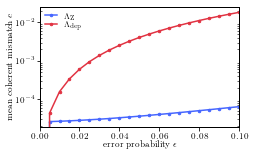

In [8]:
fig, ax = plotlib.create_fig(single_col=True,nrows=1)
x = np.linspace(0, 0.1, 21)
ax.semilogy(x,np.mean(drift_with_vd_dephasing,axis=0),'.-',label=r'$\Lambda_\mathrm{Z}$',color=colors[0])
ax.semilogy(x,np.mean(drift_with_vd_depolarizing,axis=0),'.-',label=r'$\Lambda_\mathrm{dep}$',color=colors[1])

ax.set_ylabel(r'mean coherent mismatch $c$');
ax.set_xlabel(r'error probability $\epsilon$');
ax.legend(loc="best", frameon=False, framealpha=1, ncol=1, fontsize=8)

ax.tick_params(axis="x", direction="out", which='major')
ax.tick_params(axis="y", direction="out")
ax.tick_params(right=False, top=False)

In [9]:
fig.savefig("../figures/fig-drift.pdf",
            bbox_inches='tight',
            pad_inches=0.1)